# Google Image Scraper

Hello everyone,

This Jupyter notebook provides a step-by-step guide on how to download images from Google using a Python script. The notebook leverages the `simple_image_download` library (yes, a creative name) to handle the task of fetching and downloading images or obtaining their URLs. Additionally, `matplotlib` is used to display the images.

This script is adapted from Abhay Parashar's amazing article: "17 Mindblowing Python Automation Scripts I Use Everyday."



Recommendations:
  - `simple-image-download 0.5` (Library for downloading images from google)
  -  `Python 3.10` (click on top right corner to change version)
  - `matplotlib 3.4.3` (Library for plotting graphs, but in this case it is used to display images)
  - `pillow` (Library for processing images, in this case: url --> image object --> plot using matplotlib)


In [2]:
%pip install simple-image-download
%pip install matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Words or phrases you google images of:
keywords = ['cat', 'dog', 'bird', 'snake']

# Number of images to download for each keyword:
num_images = [ 10, 5, 3, 2]

# Note: keywords and num_images must be alligned by index and consequently have the same length.

In [7]:
# Importing the libraries
from simple_image_download import simple_image_download as simp 
import matplotlib.pyplot as plt
import urllib.request

# Creating a response object
response = simp.simple_image_download

image_urls = {}

for word, num in zip(keywords, num_images):
    try:
        urls = response().urls(word, num+1) # first image is always the gstatic image
        image_urls[word] = urls[1:]
        print(f"URLs for {word}:")
        for url in urls[1:]:
            i = urls.index(url)
            print(f"\t image{i}:\t {url}")

    ## To download localy the images uncomment the following line
    # response().download(word, num)

    except Exception as e:
        print("An error occurred:", e)

URLs for cat:
	 image1:	 https://www.petz.com.br/blog/wp-content/uploads/2020/08/cat-sitter-felino.jpg
	 image2:	 https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg
	 image3:	 https://www.shutterstock.com/image-photo/cat-yellow-face-sitting-on-600nw-2470054451.jpg
	 image4:	 https://t4.ftcdn.net/jpg/02/66/72/41/360_F_266724172_Iy8gdKgMa7XmrhYYxLCxyhx6J7070Pr8.jpg
	 image5:	 https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?cs
	 image6:	 https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_3x4.jpg
	 image7:	 https://www.wfla.com/wp-content/uploads/sites/71/2023/05/GettyImages-1389862392.jpg?w
	 image8:	 https://cdn.britannica.com/70/234870-050-D4D024BB/Orange-colored-cat-yawns-displaying-teeth.jpg
	 image9:	 https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg/1200px-Cat_August_2010-4.jpg
	 image10:	 https://upload.wikimedia.org/wikipedia/commons/thumb/3/3

ValueError: num must be an integer with 1 <= num <= 2, not 3

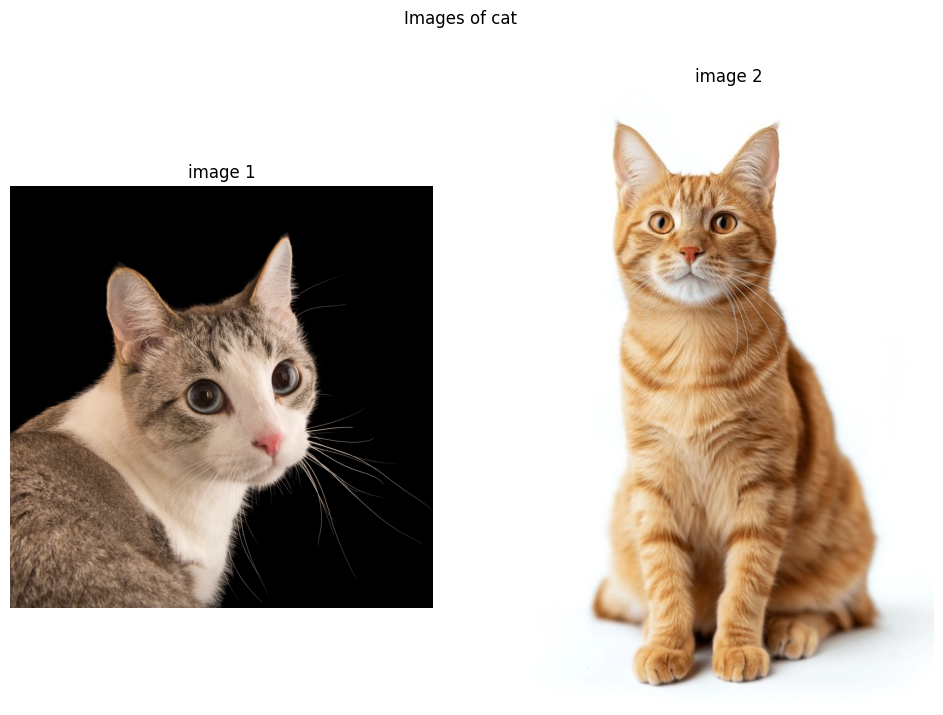

In [9]:
from PIL import Image
import requests
from io import BytesIO
import math
import matplotlib.pyplot as plt

def create_image_array(num):
    return math.ceil(num / 2)

def resize_image(image, target_size=(300, 300)):
    return image.resize(target_size, Image.LANCZOS)

def display_images(image_urls, word):
    num_images = len(image_urls)
    num_rows = create_image_array(num_images)

    plt.figure(figsize=(12, 4 * num_rows))
    plt.suptitle(f"Images of {word}")

    for index, url in enumerate(image_urls, start=1):
        response = requests.get(url)
        image = Image.open(BytesIO(response.content))
        
        # Resize the image
        resized_image = resize_image(image)

        # Plotting the image
        plt.subplot(num_rows, 2, index)
        plt.imshow(resized_image)
        plt.title(f"Image {index}")
        plt.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust for the main title
    plt.show()

for word, urls in image_urls.items():
    display_images(urls, word)


[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, None]]
